# Text Mining

### Dataprep

In [1]:
import pandas as pd 
data =  pd.read_csv('AmozonReviews_clean.csv')

In [2]:
import nltk
from nltk import FreqDist

1) Preparar os dados 

In [3]:
# Função que faz lematização, tokenização, retira pontuação e stop words, coloca o texto em minusculas

def dataPrep(review):
    
    doc = nlp(review)  
    
    res = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])   
    return res

In [ ]:
#!pip install -U spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [19]:
data["summary_clean"] = data["Summary"].apply(lambda x: dataPrep(x))

In [20]:
## Carregar dataset
#data.to_csv('AmozonReviews_clean.csv')


In [21]:
data[:10]

,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,Score,Summary,Text,fear,anger,...,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,review_clean,summary_clean
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000000,0.071429,...,0.214286,0.071429,0.214286,0.071429,0.000000,0.071429,0.214286,0.071429,buy vitality can dog food product find good qu...,good quality dog food
1,1,1,2,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.333333,0.166667,0.000000,0.000000,0.166667,product arrive label jumbo salted peanuts pean...,advertise
2,2,2,3,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,0.139535,0.093023,...,0.116279,0.046512,0.162791,0.139535,0.069767,0.139535,0.046512,0.046512,confection century light pillowy citrus gela...,delight say
3,3,3,4,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0.000000,0.000000,...,0.222222,0.111111,0.333333,0.000000,0.000000,0.000000,0.222222,0.111111,look secret ingredient robitussin believe find...,cough medicine
4,4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,0.000000,0.000000,...,0.181818,0.090909,0.272727,0.000000,0.000000,0.000000,0.181818,0.272727,great taffy great price wide assortment yumm...,great taffy
5,5,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.034483,0.103448,...,0.137931,0.068966,0.172414,0.172414,0.068966,0.034483,0.137931,0.068966,get wild hair taffy order pound bag taffy enjo...,nice taffy
6,6,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.000000,0.000000,...,0.250000,0.000000,0.250000,0.125000,0.000000,0.000000,0.250000,0.125000,saltwater taffy great flavor soft chewy cand...,great good expensive brand
7,7,7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0.000000,0.000000,...,0.285714,0.142857,0.285714,0.000000,0.000000,0.000000,0.142857,0.142857,taffy good soft chewy flavor amazing def...,wonderful tasty taffy
8,8,8,9,B000E7L2R4,A1MZYO9TZK0BBI,5,Yay Barley,Right now I'm mostly just sprouting this so my...,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,NaN,right sprout cat eat grass love rotate wheatgr...,yay barley
9,9,9,10,B00171APVA,A21BT40VZCCYT4,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.000000,0.000000,...,0.210526,0.105263,0.315789,0.052632,0.000000,0.000000,0.157895,0.157895,healthy dog food good digestion good small pup...,healthy dog food


### Nova abordagem

Indentificar as reviews positivas e as negativas, e gerar duas listas com o conjunto de palavras.

Considera-se **positivo** os sentimentos: positive, 'anticipation','joy', 'surprise', 'trust'


Considera-se **negativo** os sentimentos: negative, 'anger', 'disgust', 'fear', 'sadness'


review positiva: if (data.positive + data.joy + data.surprise + data.trust + data.antecipation) > (data.negative + data.anger + data.fear + data.sadness + data.disgust)

Intercetar as duas listas e retirar as palavras que resultam desta interseção

In [22]:
'''
data['review_clean_2'] = " "

lp =['anticipation','joy', 'surprise', 'trust']
ln =['anger', 'disgust', 'fear', 'sadness']
dic = {}

# 1.1) Identificar reviews positivas e negativas e criar uma lista para cada uma delas


# Teste se um número o é NaN (com as somas em alguns momentos estava a dar)
def isNaN(num):
    return num!= num

positive_words = []
negative_words = []
neutral_words = []

print("Primeiro ciclo")
for (ind, row)  in data.iterrows(): 
    
    review = row['review_clean']
  ##  print(review)
    pos = row['positive'] +  row['anticipation'] + row['joy'] + row['surprise'] + row['trust']
    neg = row['negative'] +  row['anger'] + row['fear'] + row['disgust'] + row['sadness']
    
    if isNaN (neg) == True:
        neg = 0
    elif isNaN (pos) == True:
        pos = 0
        
 ##   print (pos, neg)     
    
    if (pos > neg):
      ##  print ('Positive')
        [positive_words.append(x) for x in review.split() if x not in positive_words ]
    elif (pos < neg):
      ##  print('negative')
        [negative_words.append(x) for x in review.split() if x not in negative_words]
    else:
       ## print("Neutral")
        [neutral_words.append(x) for x in review.split() if x not in neutral_words]
    
##print(positive_words)


## Função que dá a interseção de duas listas
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

intersection = intersection(positive_words, negative_words)


f = open("intersection_Words.txt", "a")
f.write(str(intersection))
f.close()


print("Segundo ciclo")
for (ind, row)  in data.iterrows(): 
   
    review = row['review_clean']

    review_without_interception_words = ' '.join([word for word in review.split() if word not in intersection])
    
    data.loc[data['review_clean'] == review, "review_clean_2"] = review_without_interception_words
    
    
data.to_csv('AmozonReviews_clean_2.csv')
'''

'\ndata[\'review_clean_2\'] = " "\n\nlp =[\'anticipation\',\'joy\', \'surprise\', \'trust\']\nln =[\'anger\', \'disgust\', \'fear\', \'sadness\']\ndic = {}\n\n# 1.1) Identificar reviews positivas e negativas e criar uma lista para cada uma delas\n\n\n# Teste se um número o é NaN (com as somas em alguns momentos estava a dar)\ndef isNaN(num):\n    return num!= num\n\npositive_words = []\nnegative_words = []\nneutral_words = []\n\nprint("Primeiro ciclo")\nfor (ind, row)  in data.iterrows(): \n    \n    review = row[\'review_clean\']\n  ##  print(review)\n    pos = row[\'positive\'] +  row[\'anticipation\'] + row[\'joy\'] + row[\'surprise\'] + row[\'trust\']\n    neg = row[\'negative\'] +  row[\'anger\'] + row[\'fear\'] + row[\'disgust\'] + row[\'sadness\']\n    \n    if isNaN (neg) == True:\n        neg = 0\n    elif isNaN (pos) == True:\n        pos = 0\n        \n ##   print (pos, neg)     \n    \n    if (pos > neg):\n      ##  print (\'Positive\')\n        [positive_words.append(x) fo

# Exploratory Data Analysis

In [23]:
#data =  pd.read_csv('AmozonReviews_clean_2.csv')

In [24]:
!pip install wordcloud

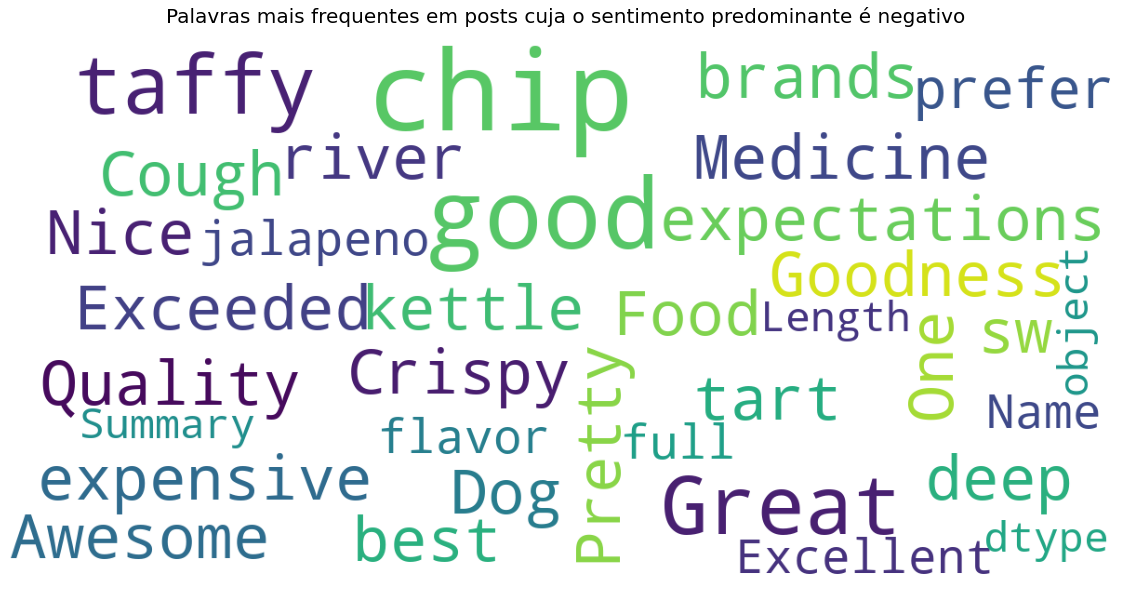

In [25]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.title('Palavras mais frequentes em posts cuja o sentimento predominante é negativo',fontsize=20)
    plt.show()
    

show_wordcloud(data[data.negative + data.anger + data.disgust + data.fear + data.sadness < data.positive + data.surprise + data.trust + data.joy].Summary) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


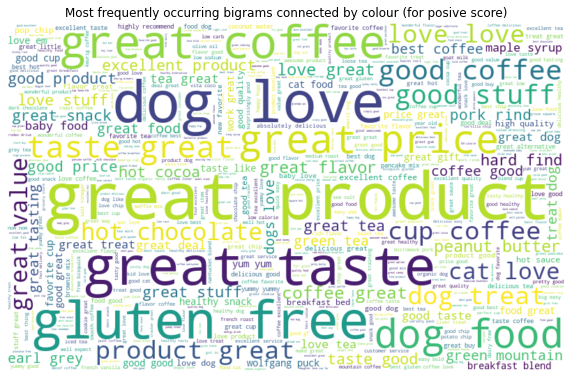

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
#text_content = dataframe['Summary'].tolist()
from nltk.corpus import stopwords

text_content = [text for text in data['summary_clean'][data['Score'] == 5]]
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])
words_dict = dict(words_freq)


nltk.download('stopwords')

stopwordsList = stopwords.words('english')
stopwordsList.append('br')

wordCloud = WordCloud(max_words=500, height=500, width=800,stopwords=stopwordsList,background_color='white')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(10, 7))
plt.title('Most frequently occurring bigrams connected by colour (for positive score)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [27]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Id', 'ProductId', 'UserId', 'Score',
       'Summary', 'Text', 'fear', 'anger', 'anticip', 'trust', 'surprise',
       'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation',
       'review_clean', 'summary_clean'],
      dtype='object')


In [28]:
print(data.Score)

0        5
1        1
2        4
3        2
4        5
        ..
19995    4
19996    5
19997    5
19998    3
19999    5
Name: Score, Length: 20000, dtype: int64


In [33]:
counts1=data['UserId'].value_counts() 
counts=data['ProductId'].value_counts()

In [44]:
counts

B006N3IG4K    455
B003VXFK44    455
B001LG945O    347
B001LGGH40    341
B005K4Q1VI    324
             ... 
B004Q4C6P8      1
B004G8X0X6      1
B004TGWCBQ      1
B007TB1SB8      1
B003639FQ8      1
Name: ProductId, Length: 2657, dtype: int64

Text(0, 0.5, 'Number of Reviews')

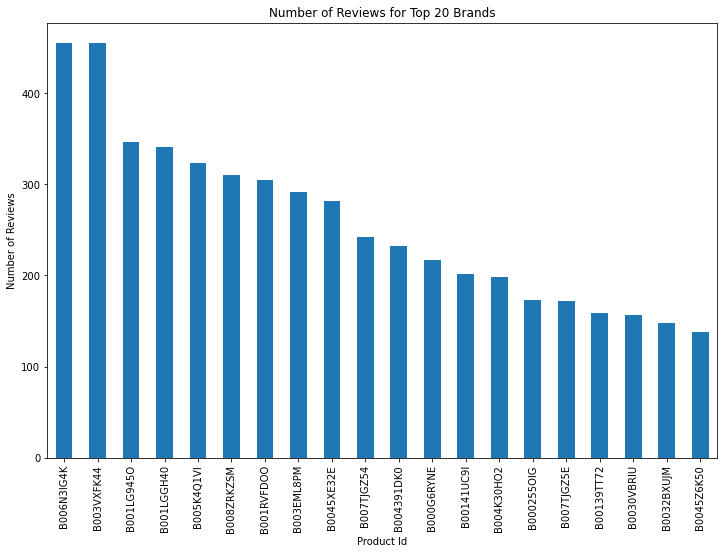

In [39]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = data["ProductId"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Product Id')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

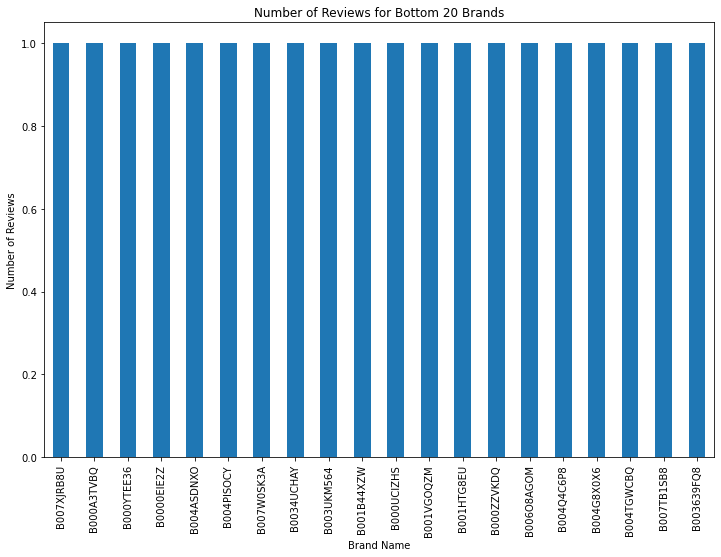

In [41]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = data["ProductId"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

## Para um produto especifico

In [47]:
product = data[(data['ProductId']=="B003VXFK44")]



,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,Score,Summary,Text,fear,anger,...,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,review_clean,summary_clean
8284,8284,8284,8285,B003VXFK44,A5U24IWH64IFF,5,Absolutely delicious coffee!,"I am a huge coffee drinker, and love the k-cup...",0.000000,0.000000,...,0.142857,0.071429,0.500000,0.071429,0.071429,0.0,0.142857,NaN,huge coffee drinker love k cup make cup quickl...,absolutely delicious coffee
8285,8285,8285,8286,B003VXFK44,A1RVCWFP3SC3GU,5,YUMMY,We always drink Timmothy's or Emeril's. Though...,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,drink timmothy emeril think try different deca...,yummy
8286,8286,8286,8287,B003VXFK44,A12SO47JRQGUPR,4,Good Stuff,Good subtle flavored coffee for the mid-aftern...,0.000000,0.000000,...,0.142857,0.142857,0.428571,0.000000,0.000000,0.0,0.142857,0.142857,good subtle flavor coffee mid afternoon pick b...,good stuff
8287,8287,8287,8288,B003VXFK44,A86RUZGD22FDR,5,Delivers what was promises,Wolfgang Puck's Chef's Reserve Colombian (Dark...,0.000000,0.000000,...,0.133333,0.133333,0.266667,0.066667,0.200000,0.0,0.066667,0.133333,wolfgang puck chef reserve colombian dark roas...,deliver promise
8288,8288,8288,8289,B003VXFK44,A3LQS08K2OBI5Z,3,My mom said this was not as flavorful as other...,This is the most USEFUL info you will ever nee...,0.045455,0.000000,...,0.136364,0.045455,0.636364,0.136364,0.000000,0.0,0.000000,NaN,useful info need know k cups take forever disc...,mom say flavorful extra bolds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,8734,8734,8735,B003VXFK44,AQQLWCMRNDFGI,4,Successful experiment!,Our Keurig coffee maker was a great Christmas ...,0.000000,0.000000,...,0.142857,0.142857,0.285714,0.000000,0.000000,0.0,0.214286,0.214286,keurig coffee maker great christmas gift year ...,successful experiment
8735,8735,8735,8736,B003VXFK44,A3K9YKYVGEENPI,3,Okay but not great,This coffee is okay but certainly not as good ...,0.000000,0.000000,...,0.200000,0.133333,0.266667,0.000000,0.000000,0.0,0.200000,0.200000,coffee okay certainly good green mountain brea...,okay great
8736,8736,8736,8737,B003VXFK44,A19P6UUJKZYC6G,3,Tasty but Expensive,"This is a great flavored coffee nevertheless, ...",0.000000,0.000000,...,0.400000,0.000000,0.200000,0.000000,0.000000,0.0,0.200000,0.200000,great flavor coffee k cup get expensive everyd...,tasty expensive
8737,8737,8737,8738,B003VXFK44,A3R7R8ARVN2P3D,4,"Great, but not perfect",I roast my own Colombian beans at home so I ha...,0.000000,0.090909,...,0.090909,0.000000,0.363636,0.181818,0.000000,0.0,0.090909,0.181818,roast colombian bean home perfect 10 reference...,great perfect


In [61]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in product['review_clean']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])


['admit', 'usually', 'drink', 'decaf', 'favorite', 'office', 'feel', 'deserve', 'good', 'rating']


In [50]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


Combien de Mots !!! 1941


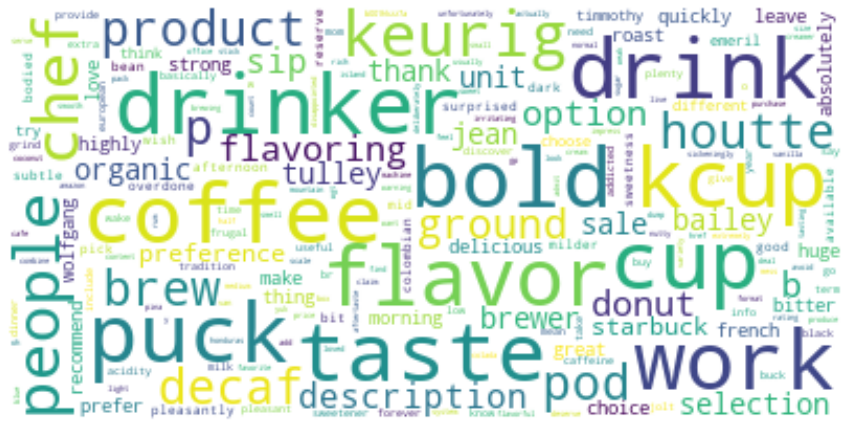

In [51]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words4))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

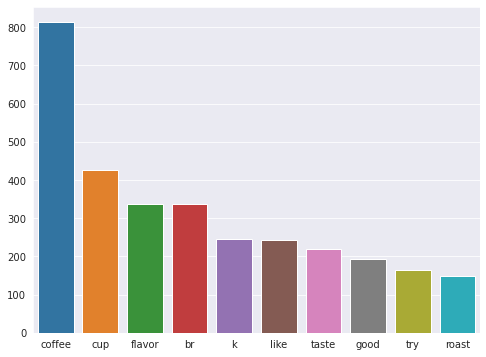

In [52]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


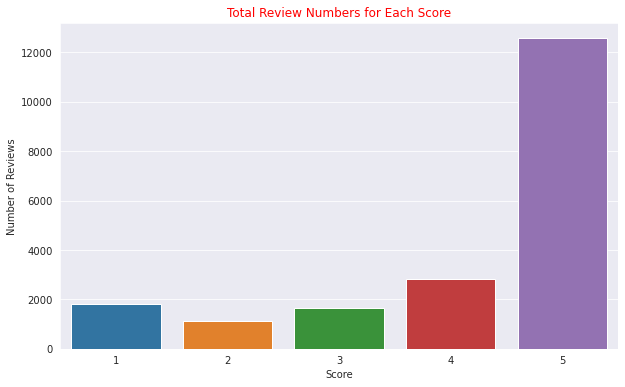

5    12571
4     2836
1     1824
3     1649
2     1120
Name: Score, dtype: int64

In [56]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(data['Score'])
plt.title('Total Review Numbers for Each Score', color='r')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
data['Score'].value_counts()

## Topic Modeling 

Vamos analisar os dados que temos 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
def freq_words(x, terms = 50):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
  

    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

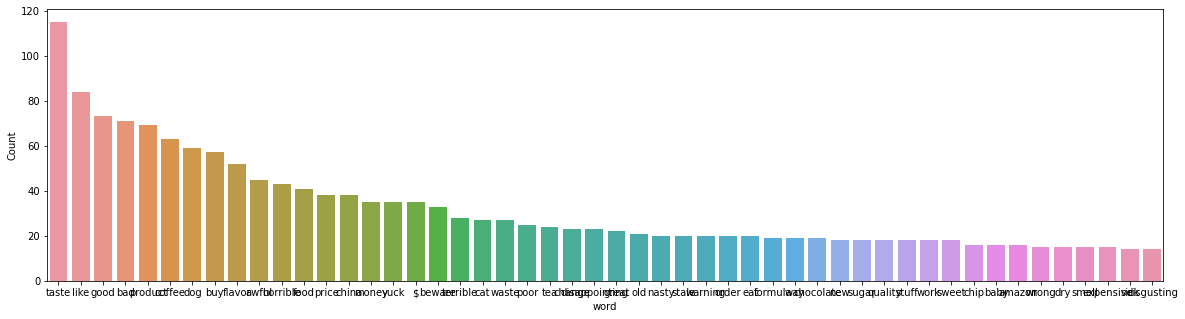

In [32]:
# 1) Analizar a frequencia de palavras

freq_words([text for text in data['summary_clean'][data['Score'] == 1]] )

<AxesSubplot:title={'center':'Top 20 bigrams in Filtered Review Text'}, xlabel='summary_clean'>

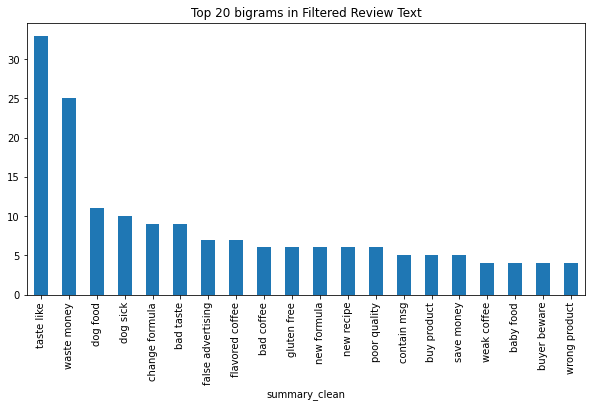

In [38]:
#library
from sklearn.feature_extraction.text import CountVectorizer
#top_n_gram function
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    # Have the count of  all the words for each review text
    bag_of_words = vec.transform(corpus) 
    # Calculates the count of all the word in the whole review text
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

common_words = top_n_ngram([text for text in data['summary_clean'][data['Score'] == 1]], 20,2)
df2 = pd.DataFrame(common_words, columns = ['summary_clean' , 'count'])
plt.figure(figsize =(10,5))
df2.groupby('summary_clean').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in Filtered Review Text')

In [44]:
common_words = top_n_ngram([text for text in data['summary_clean'][data['Score'] == 1]], 50,2)
for i in common_words:
    print(i)

('taste like', 33)
('waste money', 25)
('dog food', 11)
('dog sick', 10)
('change formula', 9)
('bad taste', 9)
('false advertising', 7)
('flavored coffee', 7)
('poor quality', 6)
('gluten free', 6)
('bad coffee', 6)
('new recipe', 6)
('new formula', 6)
('save money', 5)
('buy product', 5)
('contain msg', 5)
('baby food', 4)
('buyer beware', 4)
('weak coffee', 4)
('wrong product', 4)
('stay away', 4)
('hot chocolate', 4)
('english muffin', 4)
('customer service', 4)
('look like', 4)
('way sweet', 4)
('cat eat', 4)
('way way', 4)
('flavor coffee', 4)
('worth money', 4)
('dog treat', 4)
('taste good', 3)
('awful taste', 3)
('recipe change', 3)
('awful awful', 3)
('big disappointment', 3)
('corn syrup', 3)
('old stale', 3)
('poor packaging', 3)
('great taste', 3)
('bad batch', 3)
('baby white', 3)
('white popcorn', 3)
('taste smell', 3)
('purchase amazon', 3)
('dog like', 3)
('price high', 3)
('worst coffee', 3)
('taste awful', 3)
('good thing', 3)


In [45]:
common_words = top_n_ngram([text for text in data['summary_clean'][data['Score'] == 5]], 50,2)
for i in common_words:
    print(i)

('great product', 213)
('dog love', 155)
('great taste', 137)
('gluten free', 126)
('great coffee', 123)
('great price', 94)
('dog food', 93)
('good coffee', 69)
('taste great', 64)
('good stuff', 62)
('dog treat', 59)
('cup coffee', 57)
('great value', 52)
('hot chocolate', 52)
('cat love', 50)
('peanut butter', 49)
('great flavor', 47)
('excellent product', 45)
('great tea', 44)
('good product', 42)
('love stuff', 41)
('hot cocoa', 40)
('love love', 39)
('great snack', 39)
('great stuff', 38)
('good price', 36)
('pork rind', 35)
('green mountain', 35)
('green tea', 34)
('great food', 33)
('great tasting', 33)
('taste good', 33)
('best coffee', 33)
('earl grey', 32)
('dogs love', 32)
('great treat', 31)
('great deal', 29)
('great dog', 29)
('baby food', 29)
('maple syrup', 29)
('love tea', 28)
('wolfgang puck', 27)
('cat food', 26)
('work great', 26)
('product great', 26)
('healthy snack', 26)
('good cup', 26)
('breakfast blend', 26)
('good taste', 25)
('great gift', 25)


In [15]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


## Top palavras por review



In [ ]:
# Relação de palavras com as reviews 

total_satisfaction = satisfaction.loc[(satisfaction['Score'] >=4)]

total_satisfaction = total_satisfaction.groupby(["product_category_name"]).size().reset_index(name="amount")
total_satisfaction = total_satisfaction.merge(s, on='product_category_name')
total_satisfaction['average_satisfaction'] = total_satisfaction['amount']/total_satisfaction['total']
total_satisfaction = total_satisfaction.sort_values('average_satisfaction', ascending=False)
total_satisfaction.head(10)



###  MODELO LDA

Estes modelo permite modelar relações entre tópicos.
https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

In [27]:

# 1) criar o modelo LDA
import gensim
from gensim import corpora

reviews_2 = data['summary_clean'] 

l = []
    
# colocar as reviews numa lista
for r in reviews_2:
    l.append (r.split())
    
    
# Criar dicionário do nosso corpus, onde cada termo passa a ser represetado por um indice
dictionary = corpora.Dictionary(l)

# Criar uma matrix usando os indices do dicionario
doc_term_matrix = [dictionary.doc2bow(rev) for rev in l]

# criar uma instancia do modelo LDA
LDA = gensim.models.ldamodel.LdaModel

# criar modelo
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)


In [28]:
lda_model.print_topics()

[(0,
  '0.090*"product" + 0.061*"great" + 0.036*"well" + 0.018*"breakfast" + 0.017*"way" + 0.017*"try" + 0.016*"bold" + 0.014*"soda" + 0.012*"expensive" + 0.012*"amazon"'),
 (1,
  '0.056*"favorite" + 0.036*"treat" + 0.035*"buy" + 0.025*"mix" + 0.022*"green" + 0.020*"organic" + 0.018*"happy" + 0.017*"sugar" + 0.016*"fantastic" + 0.011*"mountain"'),
 (2,
  '0.046*"cup" + 0.032*"k" + 0.029*"perfect" + 0.028*"free" + 0.026*"chocolate" + 0.026*"wonderful" + 0.022*"little" + 0.020*"gluten" + 0.019*"blend" + 0.018*"peanut"'),
 (3,
  '0.187*"great" + 0.076*"coffee" + 0.063*"tea" + 0.055*"delicious" + 0.044*"taste" + 0.027*"best" + 0.025*"price" + 0.013*"drink" + 0.013*"find" + 0.011*"chip"'),
 (4,
  '0.143*"love" + 0.097*"dog" + 0.051*"food" + 0.027*"treat" + 0.024*"snack" + 0.024*"cat" + 0.023*"bad" + 0.023*"nice" + 0.020*"baby" + 0.016*"eat"'),
 (5,
  '0.250*"good" + 0.050*"excellent" + 0.042*"tasty" + 0.027*"healthy" + 0.027*"stuff" + 0.026*"sweet" + 0.024*"coffee" + 0.023*"taste" + 0.019*"

In [29]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.243856  0.085744       1        1  18.181576
5     -0.200171 -0.256536       2        1  15.646489
2      0.134524  0.077950       3        1  14.095325
4      0.224932 -0.050734       4        1  14.082363
0     -0.091875  0.282054       5        1  13.198124
6      0.009546 -0.123983       6        1  12.811943
1      0.166901 -0.014494       7        1  11.984181, topic_info=         Term         Freq        Total Category  logprob  loglift
2        good  2162.000000  2162.000000  Default  30.0000  30.0000
9       great  2315.000000  2315.000000  Default  29.0000  29.0000
25       love  1115.000000  1115.000000  Default  28.0000  28.0000
0         dog   752.000000   752.000000  Default  27.0000  27.0000
46    product   659.000000   659.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
322      give    34.827091    35.606732   Topic7  -5.2460   2.0994
1349    enjoy    34.579643    35.358650   Topic7  -5.2531   2.0993
1179     milk    32.775477    33.554066   Topic7  -5.3067   2.0981
437     treat   240.446010   447.496988   Topic7  -3.3139   1.5004
417       oil    41.523181    91.400175   Topic7  -5.0702   1.3326

[263 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
734       6  0.986619            $
1562      4  0.981851            3
402       2  0.989502   absolutely
1102      2  0.974856     actually
107       1  0.993446  alternative
...     ...       ...          ...
397       2  0.989699          wow
649       4  0.989998         year
1095      7  0.977877         yuck
256       6  0.993998          yum
34        6  0.995992        yummy

[237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 5, 1, 7, 2])

# WORK IN PROGESS ON MY PC ....